Data Analysis on Heart Disease Patient Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns; sns.set()  # for plot styling
import sklearn.preprocessing as preprocessing

%matplotlib inline

#### 1. Import data and summarise

In [ ]:
df = pd.read_csv('winequality-white.csv', delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df['quality'].describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

Skewness: 0.155796
Kurtosis: 0.216526


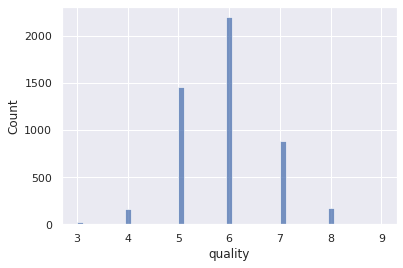

In [ ]:
sns.histplot(df['quality'])

#skewness and kurtosis
print("Skewness: %f" % df['quality'].skew())
print("Kurtosis: %f" % df['quality'].kurt())


#### 2. Visualise relation between features and target variable (quality)

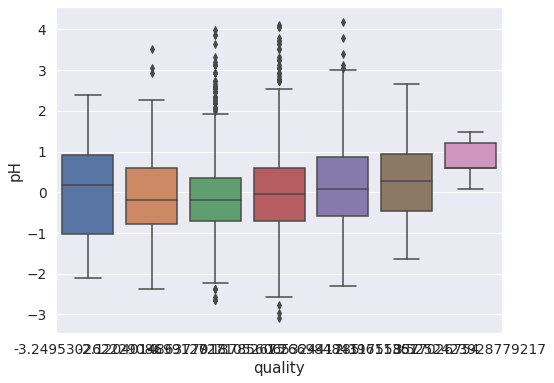

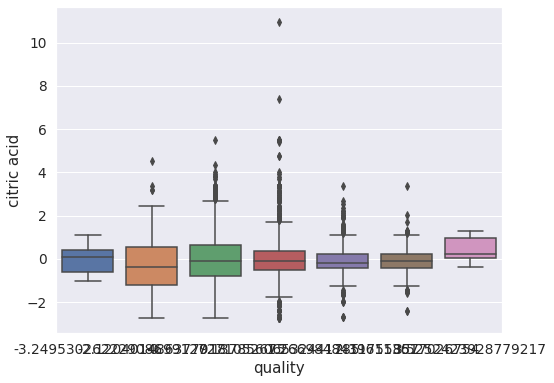

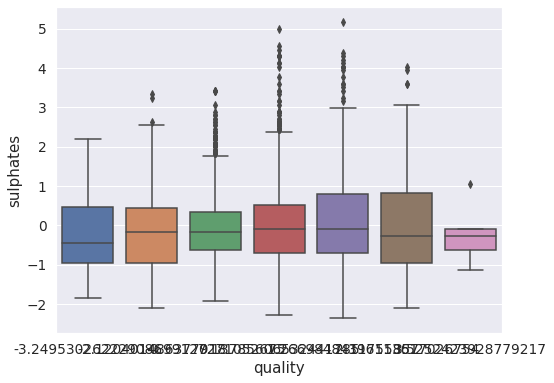

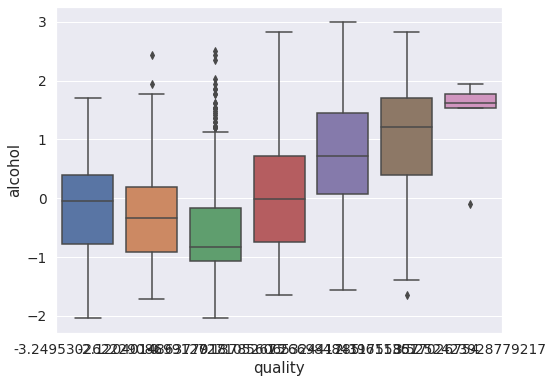

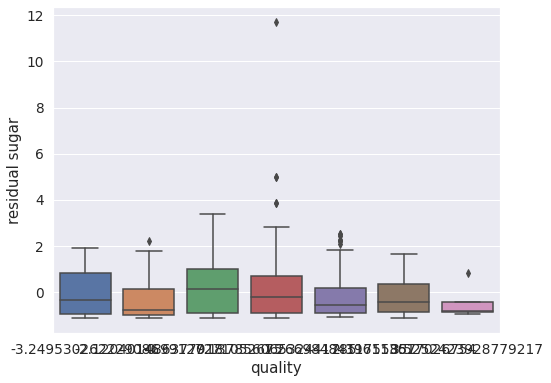

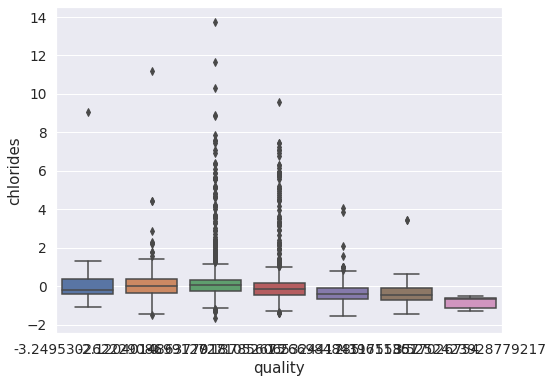

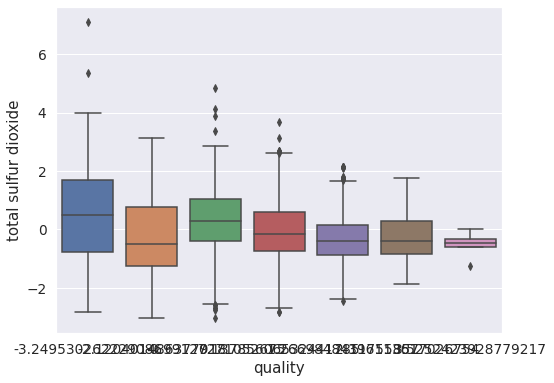

In [ ]:
#scatter plot grlivarea/saleprice
attributes = ['pH', 'citric acid', 'sulphates', 'alcohol', 'residual sugar', 'chlorides', 'total sulfur dioxide']
for var in attributes:
    data = pd.concat([df['quality'], df[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x="quality", y=var, data=data)



#### 3. Correlation matrix with heatmap

In [ ]:
X = df.drop(['quality'], axis = 1, inplace = False)

In [ ]:
X_norm = (X-X.mean())/X.std()

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.172079,-0.081762,0.213258,2.821061,-0.035351,0.569873,0.744489,2.331274,-1.246794,-0.349149,-1.393010,0.137856
1,-0.657434,0.215874,0.047996,-0.944669,0.147732,-1.252891,-0.149669,-0.009153,0.739953,0.001342,-0.824192,0.137856
2,1.475600,0.017450,0.543783,0.100272,0.193503,-0.312109,-0.973236,0.358628,0.475053,-0.436771,-0.336633,0.137856
3,0.409083,-0.478608,-0.117266,0.415726,0.559670,0.687471,1.120977,0.525802,0.011479,-0.787262,-0.499152,0.137856
4,0.409083,-0.478608,-0.117266,0.415726,0.559670,0.687471,1.120977,0.525802,0.011479,-0.787262,-0.499152,0.137856


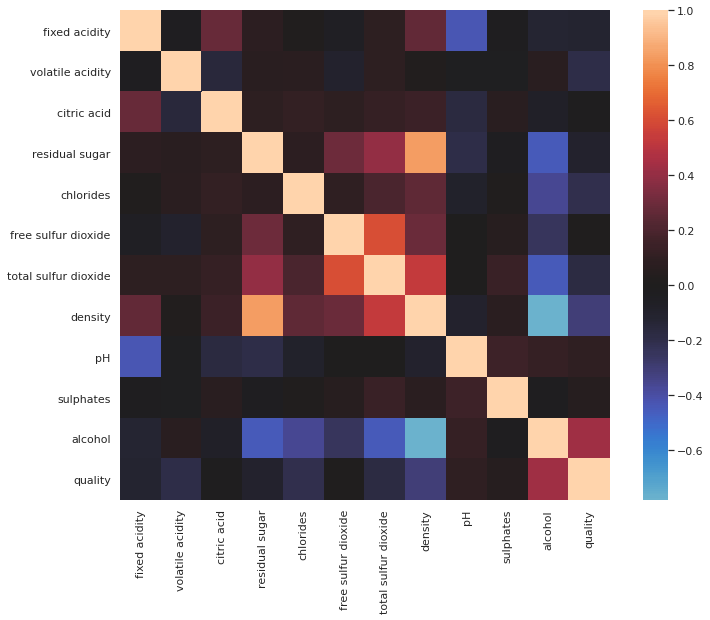

In [ ]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, center=0, square=True);

A few conclusions from this correlation matrix:
- Quality seems to only be directly correlated with alcohol.
- However, alcohol seems to be negatively correlated with density and residual sugar (and total sulfur dioxide a bit maybe).
- If we keep going, residual sugar seems to not be correlated with anything else other than with density (and total & free sulfur dioxide maybe, but perhaps at the same level as alcohol did).
- Looking at pH, citric acid and volatile acidity, they don't seem to be correlated with anything else at all. Would be interesting to do a classification with reduced features and another with a more ample array of features.

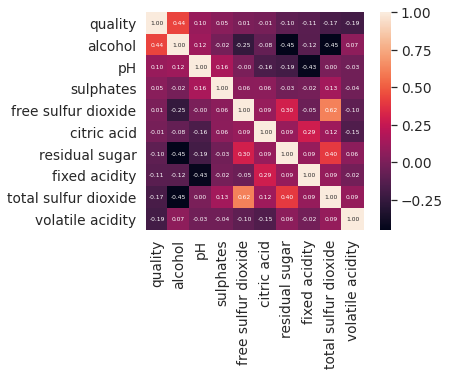

In [ ]:
# Zoomed into quality
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'quality')['quality'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 6}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### 4. Scatter plots across some of the higher correlated features

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


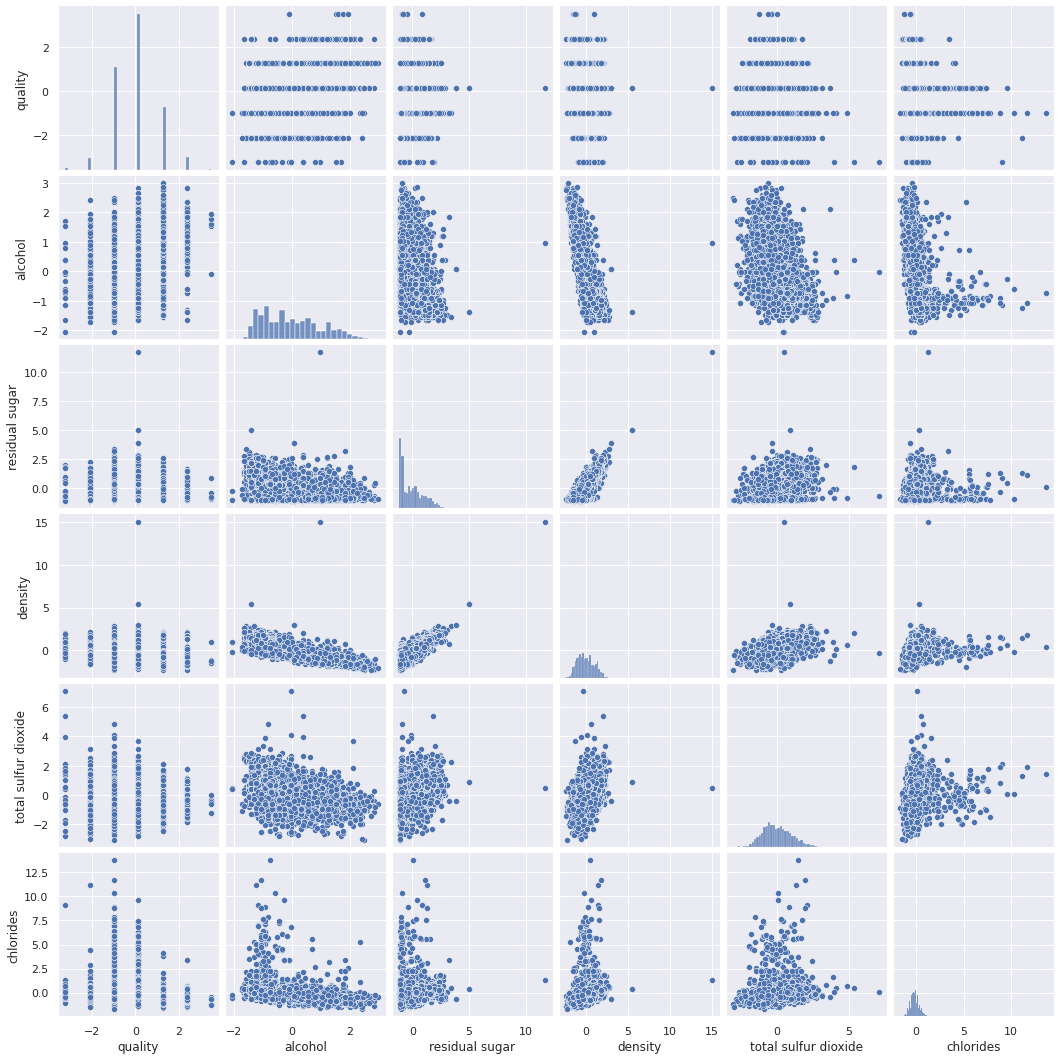

In [ ]:
#scatterplot
sns.set()
cols = ['quality', 'alcohol', 'residual sugar', 'density', 'total sulfur dioxide', 'chlorides']
sns.pairplot(df[cols], size = 2.5)
plt.show();

#### 5. Check for missing data
And delete it as appropiate.

In [ ]:
# missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
fixed acidity,0,0.0
volatile acidity,0,0.0
citric acid,0,0.0
residual sugar,0,0.0
chlorides,0,0.0
free sulfur dioxide,0,0.0
total sulfur dioxide,0,0.0
density,0,0.0
pH,0,0.0
sulphates,0,0.0


In [ ]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

NameError: name 'df_train' is not defined

#### 6. Outliers

###### 6.1. Univariate analysis

In [ ]:
#standardizing data
quality_scaled = StandardScaler().fit_transform(df['quality'][:,np.newaxis]);
low_range = quality_scaled[quality_scaled[:,0].argsort()][:10]
high_range= quality_scaled[quality_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)



outer range (low) of the distribution:
[[-3.24986203]
 [-3.24986203]
 [-3.24986203]
 [-3.24986203]
 [-3.24986203]
 [-3.24986203]
 [-3.24986203]
 [-3.24986203]
 [-3.24986203]
 [-3.24986203]]

outer range (high) of the distribution:
[[2.39635826]
 [2.39635826]
 [2.39635826]
 [2.39635826]
 [2.39635826]
 [3.52560231]
 [3.52560231]
 [3.52560231]
 [3.52560231]
 [3.52560231]]
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [ ]:
X_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.172079,-0.081762,0.213258,2.821061,-0.035351,0.569873,0.744489,2.331274,-1.246794,-0.349149,-1.393010
1,-0.657434,0.215874,0.047996,-0.944669,0.147732,-1.252891,-0.149669,-0.009153,0.739953,0.001342,-0.824192
2,1.475600,0.017450,0.543783,0.100272,0.193503,-0.312109,-0.973236,0.358628,0.475053,-0.436771,-0.336633
3,0.409083,-0.478608,-0.117266,0.415726,0.559670,0.687471,1.120977,0.525802,0.011479,-0.787262,-0.499152
4,0.409083,-0.478608,-0.117266,0.415726,0.559670,0.687471,1.120977,0.525802,0.011479,-0.787262,-0.499152


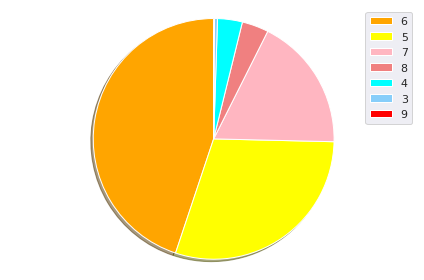

In [ ]:
# Visualising quality
temp = df['quality'].value_counts()
dfviz = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

#df.plot(kind='pie',labels='labels',values='values', title='Activity Ditribution',subplots= "True")

labels = dfviz['labels']
sizes = dfviz['values']
colors = ['orange', 'yellow', 'lightpink', 'lightcoral','cyan','lightskyblue', 'red']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
y = df['quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size= 0.4)

In [ ]:
# Create the parameter grid
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]


In [ ]:
from sklearn import svm

In [ ]:
# Performing CV to tune parameters for best SVM fit 
#svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
Y_pred = svm_model.predict(X_test)
#Y_pred_label = list(encoder.inverse_transform(Y_pred))

In [ ]:
print("Training set score for SVM: %f" % svm_model.score(X_train , y_train))
print("Testing  set score for SVM: %f" % svm_model.score(X_test  , y_test ))

Training set score for SVM: 0.622192
Testing  set score for SVM: 0.566837


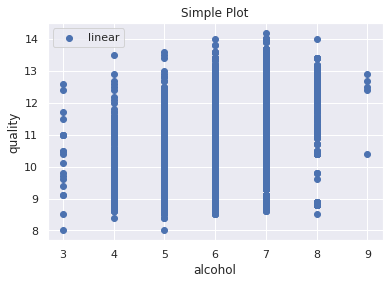

In [ ]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.scatter(df['quality'], df['alcohol'], label='linear')  # Plot some data on the axes.
ax.set_xlabel('alcohol')  # Add an x-label to the axes.
ax.set_ylabel('quality')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=18cf4704-3790-49a3-8d94-41dc8f485b71' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>